In [4]:
from packages import *
from base_time_series import *
from base_spatial import *
from misc import *

import packages; importlib.reload(packages)
import base_time_series; importlib.reload(base_time_series)
import base_spatial; importlib.reload(base_spatial)
import misc; importlib.reload(misc)

from scipy.optimize import curve_fit

#import ufl
#from dune import grid

#import dune.grid
#import dune.fem
#import dune.ufl

from scipy.optimize import curve_fit

def lin(x, a, b): return (a + b*x)

In [5]:
def spiral_load(s, init=10):
    df = pd.read_csv('/Users/tphillips/'+s+'.dat', sep=" ", names=['t', 'lon', 'lat', 'u']) 
    # history.dat histor_v.dat

    df_rows = df.set_index(["t", "lon", "lat"])
    T = xr.Dataset.from_dataframe(df_rows)

    # weights_array, lons, lats, pc, eof, varfrac = eof_run(f)
        
    T_detr = T
    temp_detr = T_detr['u'].values[init:]
    lons = T_detr['lon'].values
    lats = T_detr['lat'].values
                 
    solver = Eof(temp_detr) 

    pc  = solver.pcs(npcs=10, pcscaling=0)
    eof = solver.eofs(neofs=10)
    varfrac = solver.varianceFraction()
    lambdas = solver.eigenvalues()

    return(T, temp_detr, lons, lats, pc, eof, varfrac, lambdas)

def spiral_plot(lons, lats, pc, eof, varfrac, no=1, sv=None):

    clevs = np.linspace(0, 240, 20)
    f, ax = plt.subplots(1, 1, figsize=(4, 2), sharey=True)

    no = no
    c = eof[no-1].flatten()                          
    c = np.mean(c[~np.isnan(c)])                   
    pc1 = c*np.array(pc[:,no-1])                       
    eof1 = (1/c)*eof[no-1].squeeze()                                           
    
    ax.plot(pc1, color='b', linewidth=0.5)      
    ax.axhline(0, color='k', ls='--', alpha=0.5)
    frac = str(np.array(varfrac[no-1]*100).round(4))
    ax.set_title(frac+"%", fontsize=18)    
    ax.set_xlabel('t')
    ax.set_ylabel("PC 1", fontsize=18)

    f, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=False)
    fill = ax.contourf(lons, lats, eof1, cmap=plt.cm.RdBu_r)  
    # set_ax(ax, lat2, lat1, lon1, lon2) 
    ax.set_title('EOF '+str(no), fontsize=18)
    
    a = 1.8
    cbar_ax = f.add_axes([0.94, 0.13, a*0.011, a*0.41]) 
    f.canvas.mpl_connect('resize_event', resize_colobar)
    cb = f.colorbar(fill, cax=cbar_ax, orientation='vertical')   

    if sv:    
        f.savefig(sv + '.png', format='png', dpi=120, bbox_inches="tight")

In [ ]:
# read flash.dat to a list of lists
s = "/Users/tphillips/Atmospheric time series/spiral_chaos/ezspiral/"
datContent = [i.strip().split() for i in open(s+"history.dat").readlines()]

# write it as a new CSV file
with open(s+"history.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

In [5]:
s = '/Users/tphillips/Atmospheric time series/spiral_chaos/ezspiral/'
#dataframe = pd.read_csv(s+"history.csv")

#s = '/Users/tphillips/Atmospheric time series/spiral_chaos/ezspiral/'
df = pd.read_csv(s+'history.dat', sep=" ", 
                 names=['time', 'lon', 'lat', 'u']) 

df_rows = df.set_index(["time", "lon", "lat"])
ds = xr.Dataset.from_dataframe(df_rows)

dataframe = pd.read_csv(s+"history.csv")

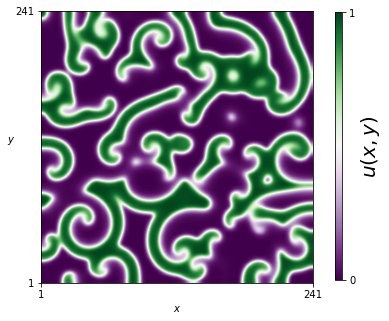

In [6]:
df1 = df[df['time'] > 622.8]
u = df1['u']

normalizer=Normalize(0,1) 
im=cm.ScalarMappable(norm=normalizer)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
#fig.subplots_adjust(right=0.8)
        
z = np.array(u) 
z = z.reshape(241, 241)
z = np.array(z).T
    
im = ax.imshow(z, extent=(0, 0.1, 0, 0.1), cmap='PRGn', norm=normalizer, interpolation='sinc') #'sinc'
#ax.set_xticks([0,200])
#start, end = (plot - 1)*200, plot*200
#mid = int((start + end)/2)
#ax.set_xticklabels([r'{}'.format(start),r'{}'.format(end)])
ax.invert_yaxis()
    
ax.set_xticks([0.0,0.1])
ax.set_yticks([0.1,0.0])
ax.set_xlabel(r'$x$', rotation= 0) 
ax.set_ylabel(r'$y$', rotation= 0) 
ax.set_xticklabels([r'1',r'241'])
ax.set_yticklabels([r'1',r'241'])

cbar_ax = fig.add_axes([(0.95), (0.133), (0.02), (0.743)])
cbar = fig.colorbar(im, ticks=[0,1], cax=cbar_ax) # , ax=ax.ravel().tolist()
#cbar.ax.set_yticklabels([r'-$\pi$', r'$\pi$'])

cbar.set_label(r'$u(x,y)$', fontsize=20) 

#plt.show()
#fig.savefig('/Users/tphillips/Atmospheric time series/pap2_pics/spiral_chaos_3.png', format='png', dpi=150, bbox_inches="tight")

In [10]:
s = 'Atmospheric time series/spiral_chaos/ezspiral/history'
T, temp_detr, lons, lats, pc, eof, varfrac, lambdas = spiral_load(s, init=10)

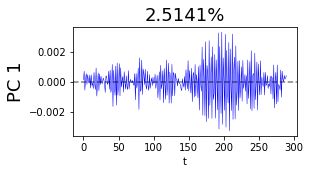

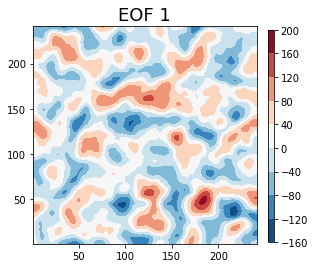

In [101]:
spiral_plot(lons, lats, pc, eof, varfrac, no=1)

#d, a, r_trend, vpc, tp_, vtr, d_err   = p_val(pc1, ar=0, an=True)
#d, a, r_trend, vpc, tarp_, vtr, d_err = p_val(pc1, ar=1, an=True)

In [ ]:
s = 'Atmospheric time series/spiral_chaos/ezspiral/history'

df = pd.read_csv('/Users/tphillips/'+s+'.dat', sep=" ", names=['t', 'lon', 'lat', 'u']) 
df_rows = df.set_index(["t", "lon", "lat"])
T = xr.Dataset.from_dataframe(df_rows)

coor = [1, 1, 240, 11] # [65, 3, 47, 23]
var_size = []

for i in range(20):
   
    var_size = vfrac(T, coor, var_size, ret='Dkld', sys='spiral')
    coor[3] += 10

239


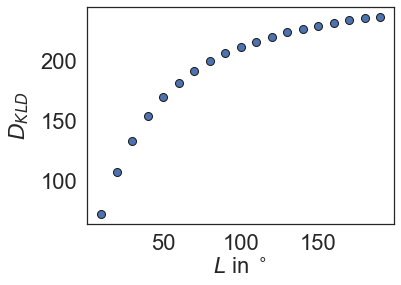

In [10]:
sns.set_theme(style="white", rc=params) 

f, ax = plt.subplots(1, 1, figsize=(5.5, 4), sharex=True)
xlist = np.arange(10, 200, 10)

ax.plot(xlist, var_size[:19], 'bo', markersize=8, mec='k') #, label='Ger. var.'

ax.set_ylabel(r'$D_{KLD}$', labelpad=10)
ax.set_xlabel(r'$L$ in $^\circ$')

def lin(x, a, b): return (a + b*x)

#popt, pcov = curve_fit(lin, xlist, var_size[:19]) 
#ax.plot(xlist, lin(xlist, *popt), 'r-', label=r'$y = a + b \cdot x$')
#ax.legend(loc='upper right', ncol=2)
     
f.savefig('Dkld_spiral_wave.png', format='png', dpi=120, bbox_inches="tight") 

In [15]:
coor = [1, 1, 240, 11]
var_size = []

for i in range(20):
   
    var_size = vfrac(T, coor, var_size, sys='spiral')
    coor[3] += 10

0.02678244259401581


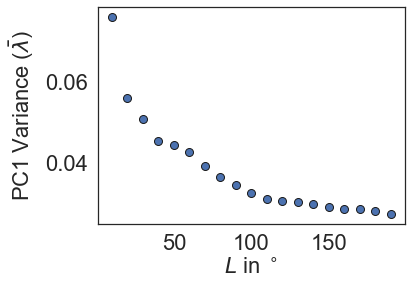

In [16]:
sns.set_theme(style="white", rc=params) 

f, ax = plt.subplots(1, 1, figsize=(5.5, 4), sharex=True)
xlist = np.arange(10, 200, 10)

ax.plot(xlist, var_size[:19], 'bo', markersize=8, mec='k') 

ax.set_ylabel(r'PC1 Variance ($\bar{\lambda}$)', labelpad=10)
ax.set_xlabel(r'$L$ in $^\circ$')

def lin(x, a, b): return (a + b*x)
     
f.savefig('pc1_spiral_wave.png', format='png', dpi=120, bbox_inches="tight") 

### Comparison to climate data

In [ ]:
f = '/Users/tphillips/Atmospheric time series/big/T_ceneur_sea_05_day_ecmwf_50to2020.nc'
T = xr.open_dataset(f)

coor = [48, 3, 47, 4] # [65, 3, 47, 23]
var_size = []

for i in range(10):
   
    var_size = vfrac(T, coor, var_size)
    coor[3] += 2
    var_size = vfrac(T, coor, var_size)
    coor[0] += 2

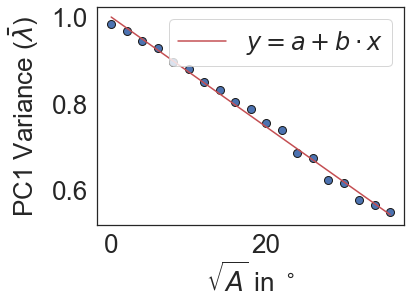

In [8]:
params = {'xtick.labelsize': 26, 'ytick.labelsize': 26,
          'legend.fontsize': 24, 'axes.labelsize': 26,
          'axes.titlesize': 26, 'font.size': 26,
          'legend.handlelength': 2}

sns.set_theme(style="white", rc=params)

f, ax = plt.subplots(1, 1, figsize=(5.5, 4), sharex=True)
xlist = np.arange(0, 2*19, 2*1)

ax.plot(xlist, var_size[:19], 'bo', markersize=8, mec = 'k') #, label='Ger. var.'

ax.set_ylabel(r'PC1 Variance ($\bar{\lambda}$)', labelpad=10)
ax.set_xlabel(r'$\sqrt{A}$ in $^\circ$')

popt, pcov = curve_fit(lin, xlist, var_size[:19]) 
ax.plot(xlist, lin(xlist, *popt), 'r-', label=r'$y = a + b \cdot x$')
ax.legend(loc='upper right', ncol=2)

In [17]:
s = 'Atmospheric time series/spiral_chaos/ezspiral/history'

df = pd.read_csv('/Users/tphillips/'+s+'.dat', sep=" ", names=['t', 'lon', 'lat', 'u']) 
df_rows = df.set_index(["t", "lon", "lat"])
T = xr.Dataset.from_dataframe(df_rows)

coor = [1, 1, 11, 11] # [65, 3, 47, 23]
var_size_s = []

for i in range(20):
   
    var_size_s = vfrac(T, coor, var_size_s, sys='spiral')
    coor[3] += 10
    var_size_s = vfrac(T, coor, var_size_s, sys='spiral')
    coor[2] += 10

0.027498163411739652


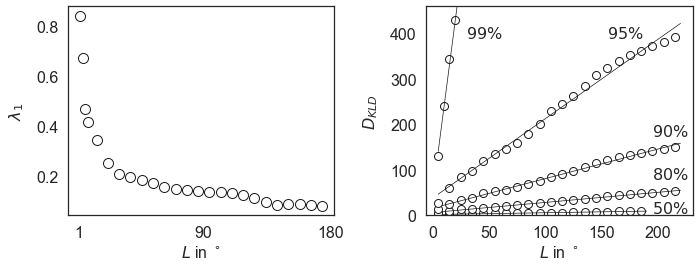

In [ ]:
st = '/Users/tphillips/mpipks/Atmospheric_time_series/vfrac/vfrac_sea2_cnorm_L_' 
df = pd.read_csv(st+'180.0_-90.0_wtoe_180_ns'+'_pc1'+'.csv', sep='\t')  
var_size1 = np.array(df['varc_size'])    

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

s=16
params = {'xtick.labelsize': s, 'ytick.labelsize': s, 'legend.fontsize': s-1.5,
              'axes.labelsize': s, 'font.size': s, 'legend.handlelength': 2}
sns.set_theme(style="white", rc=params)

xlist = np.arange(2, 180, 2) 
xl = xlist[:4].tolist() + xlist[6::4].tolist()
vl = var_size1[:4].tolist() + var_size1[6::4].tolist()

ax1.plot(xl, vl, 'wo', markersize=10, mec = 'k')
ax1.set_ylabel(r'$\lambda_1$', labelpad=10)
ax1.set_xlabel(r'$L$ in $^\circ$')
ax1.set_xticks([1,90,180])

###

l = ['batch_vfrac_sea2_cnorm_5deg_L_0.0_0.0_wtoe_90_ew_Dkld', 'batch_vfrac_sea2_cnorm_5deg_L_180.0_0.0_etow_90_ew_Dkld']
st = '/Users/tphillips/Atmospheric time series/simulations/'
df = pd.read_csv(st+l[0]+'.csv', sep='\t')  

n = len(df['varc05'])
xlist = np.arange(5, 5*(n+1), 5)
f_l = ['varc08', 'varc09', 'varc095'] # 'varc05', 

fl, g_l = [0.5, 0.8, 0.9, 0.95], []

a = 38
ax2.plot(xlist[:a:2], np.array(df['varc05'])[:a:2], 'wo', markersize=8, mec='k', label='')
popt, pcov = curve_fit(lin, xlist, np.array(df['varc05'])) 
ax2.plot(xlist[:a], lin(xlist, *popt)[:a], 'k-', linewidth=0.7)
g_l.append(popt[1])

for i in f_l:
    ax2.plot(xlist[::2], np.array(df[i])[::2], 'wo', markersize=8, mec='k', label='')
    popt, pcov = curve_fit(lin, xlist, np.array(df[i])) 
    ax2.plot(xlist, lin(xlist, *popt), 'k-', linewidth=0.7)
    g_l.append(popt[1])

ax2.plot(xlist, np.array(df['varc099']), 'wo', markersize=8, mec = 'k')
popt, pcov = curve_fit(lin, xlist[:5], np.array(df['varc099'])[:5]) 
ax2.plot(xlist[:5], lin(xlist[:5], *popt), 'k-', linewidth=0.7, label=r'$y = a + b \cdot x$')
g_l.append(popt[1])

ax2.set_ylabel(r'$D_{KLD}$', labelpad=10)
ax2.set_xlabel(r'$L$ in $^\circ$')
ax2.set_ylim([0,460])

ax2.text(195, 5, r"$50\%$")
ax2.text(195, 80, r"$80\%$")
ax2.text(195, 175, r"$90\%$")
ax2.text(155, 390, r"$95\%$")
ax2.text(30, 390, r"$99\%$")

f.tight_layout()
f.savefig('ecmwf/vfrac_eig_Dkld_sea2_cnorm_5deg_L_0_0_wtoe_90_ew.png', format='png', dpi=120, bbox_inches="tight")